In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pypsa
import pandas as pd
import numpy as np

plt.style.use(["bmh", "../../matplotlibrc"])
sns.set_palette("colorblind")

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

In [69]:
files = {
    "perfectly inelastic": "../../results/20240424-70a/network_solved_LT-country+DE-inelastic+true.nc",
    "VOLL 2000 €/MWh": "../../results/20240424-70a/network_solved_LT-country+DE-voll+true.nc",
    "PWL-elastic": "../../results/20240424-70a/network_solved_LT-country+DE-elastic_pwl+default.nc",
    "linear elastic": "../../results/20240424-70a/network_solved_LT-country+DE-elastic+true-elastic_intercept+2000.nc",
}
ns = {k: pypsa.Network(v) for k, v in files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-inelastic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic+true-elastic_intercept+2000.nc has buses, carriers, generators, links, loads, stores


/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/tmp/ipykernel_1659795/4152282507.py:59: UserWarning: This figure includes Axes that are not

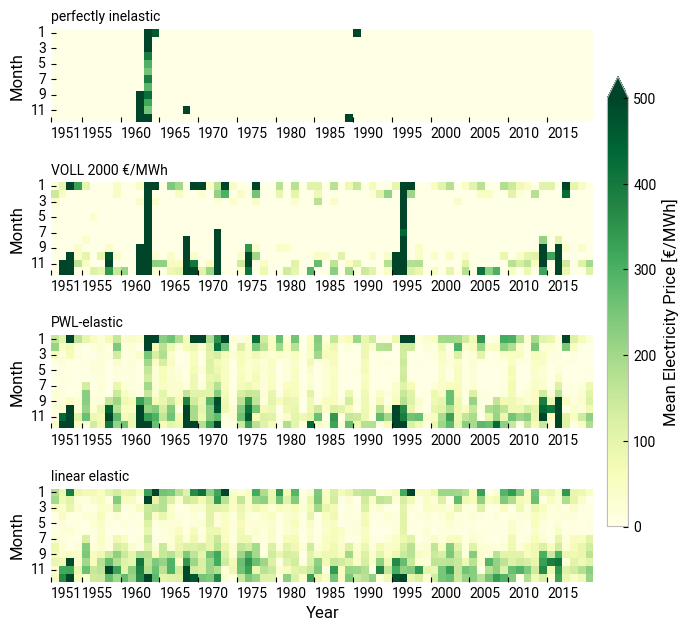

In [70]:
fig, axs = plt.subplots(4, 1, figsize=(7 ,7.5), sharey=True, sharex=False, gridspec_kw={'wspace': 0.3, 'hspace': 0.3})

norm = plt.Normalize(0, 500)
cmap = "YlGn"

for i, ax in enumerate(axs.flatten()):

    key = list(ns.keys())[i]
    n = ns[key]
    lmp = n.buses_t.marginal_price["electricity"]
    lmp = lmp.groupby([lmp.index.year, lmp.index.month]).mean().unstack()

    sns.heatmap(
        lmp.T,
        ax=ax,
        square=True,
        cbar=False,
        cmap=cmap,
        norm=norm

    )

    ax.set_title(key, loc='left', fontsize='medium')
    ax.set_ylabel("Month")

    if i == 3:
        ax.set_xlabel("Year")
    else:
        ax.set_xlabel("")

    plt.setp(ax.get_yticklabels(), rotation=0)

    xtick_labels = [1951] + [year for year in range(1955, 2020, 5)]
    xtick_positions = [lmp.index.get_loc(year) for year in xtick_labels]

    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(xtick_labels)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="left")


cbar_ax = fig.add_axes([0.92, 0.2, 0.03, 0.6])

fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=cbar_ax,
    orientation='vertical',
    fraction=.1,
    #shrink=0.5,
    label="Mean Electricity Price [€/MWh]",
    extend='max',
)

fig.subplots_adjust(right=0.9)

#plt.tight_layout()


for ext in ["png", "pdf"]:
    plt.savefig(f"../../resources/figure-heatmaps.{ext}", bbox_inches='tight', dpi=300)

In [71]:
lmp.index.get_loc(1951)

0